# 0. Imports and Settings

In [42]:
%%HTML
<link rel="stylesheet" href="custom.css">

In [43]:
# Imports
from fredapi import Fred
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import ipywidgets as widgets
import time
import geopandas as gpd

load_dotenv()
API_KEY = os.getenv('API_KEY')
fred = Fred(API_KEY)

<h2><b>Analisi economica degli Stati Uniti d' America</b></h2>
<p>Davide Cossidente</p>
<p>Matricola: 166898</p>


<div style="padding-top: 5px; font-size: medium;">
    <h4>Fondamenti Di Scienza Dei Dati E Laboratorio</h4>
    <h5 class="right">10/07/2024</h5>
</div>

<h1 style="font-weight: 400;">1. Origine dello studio</h1>
<h3>Motivazioni</h3>
<ul>
    <li>Predizione di tendenze economiche</li>
    
</ul>
<h3>Interesse</h3>

<h1 style="font-weight: 400;">2. Descrizione dei dati</h1>
<p> 
    I dati utilizzati per il progetto provengono dal FRED (Federal Reserve Economic Data). <br>
    Il FRED contiene una vasta raccolta di dati economici statunitensi forniti gratuitamente dalla <br>
    Federal Reserve Bank di St. Louis 🏦 
</p>

<h3>Caratteristiche principali del dataset:</h3>
<ul>
    <li>Ampia Copertura 🌎</li>
    <li>Aggiornamenti Regolari 🕦</li>
    <li>Facilità di accesso ai dati 📊</li>
</ul>

<p>
    Per ulteriori dettagli e per esplorare il dataset: <a href="https://fred.stlouisfed.org/">FRED</a>.
</p>

<h1 style="font-weight: 400;">3. Analisi sull'Economia Statunitense</h1>
<h2  style="font-weight: 400;">Sommario</h2>
<ul>
    <li>3.1 Esiste una correlazione tra tasso di interesse ed inflazione?</li>
    <ul>
        <li>3.1.1 Cosa succede durante i periodi di crisi? </li>
    </ul>
    <li>3.2 </li>
    <li>3.3 </li>
    <li>3.4 </li>
</ol>

## 3.1 Relazione tra tasso di interesse ed inflazione

In [65]:
# Retrieving Data
# Interest rate
interestRate = fred.get_series("FEDFUNDS")
# Inflation Rate
inflationRate = fred.get_series("CPIAUCSL")

# Merging Series into a DF
data = pd.DataFrame({
    "InterestRate": interestRate,
    'InflationRate': inflationRate.pct_change() * 100
}).dropna()

"""
# Plotting the correlation matrix into an heatmap
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()
"""

"\n# Plotting the correlation matrix into an heatmap\nplt.title('Correlation Matrix')\nsns.heatmap(data.corr(), annot=True, cmap='coolwarm')\nplt.show()\n"

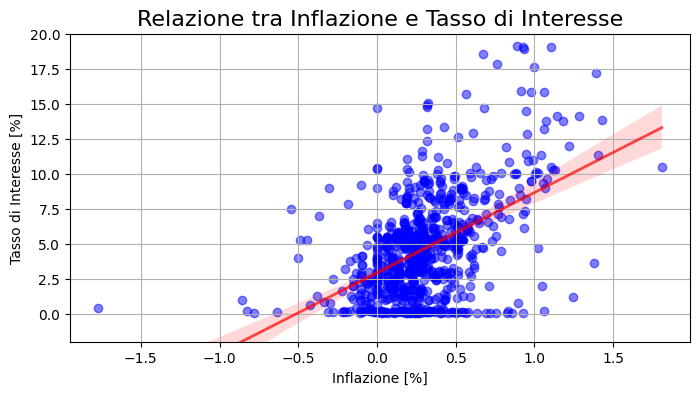

In [64]:

# Grafico di dispersione con linea di regressione
plt.figure(figsize=(8, 4))  # Imposta le dimensioni della figura

# Utilizza seaborn per plottare il grafico di dispersione con la linea di regressione
sns.regplot(x=data['InflationRate'], y=data['InterestRate'], scatter_kws={'alpha':0.5, 'color': "blue"}, line_kws={"color":"red","alpha":0.7,"lw":2})  

# Aggiungi titolo e label agli assi
plt.title('Relazione tra Inflazione e Tasso di Interesse', fontsize=16)
plt.xlabel('Inflazione [%]')
plt.ylabel('Tasso di Interesse [%]')

# Aggiungi una griglia di supporto
plt.grid(True)
plt.ylim([-2,20])
# Mostra il grafico
plt.show()


In [63]:
from scipy.stats import linregress

# Regressione lineare dei dati precedenti
slope, intercept, r_value, p_value, std_err = linregress(data['InflationRate'], data['InterestRate'])
print(f"Pendenza (m): {slope}")
print(f"Intercetta (q): {intercept}")
print(f"Coefficiente di correlazione (r): {r_value}")
print(f"Valore p: {p_value}")
print(f"Errore standard della regressione: {std_err}")

Pendenza (m): 5.726346120299733
Intercetta (q): 2.9263458827226128
Coefficiente di correlazione (r): 0.4990321991516698
Valore p: 4.876025841490212e-54
Errore standard della regressione: 0.3437135745666189


<p>
Pendenza (m): 5.726346120299733 <br>
Intercetta (q): 2.9263458827226128<br>
Coefficiente di correlazione (r): 0.4990321991516698<br>
Valore p: 4.876025841490212e-54<br>
Errore standard della regressione: 0.3437135745666189<br>
</p>

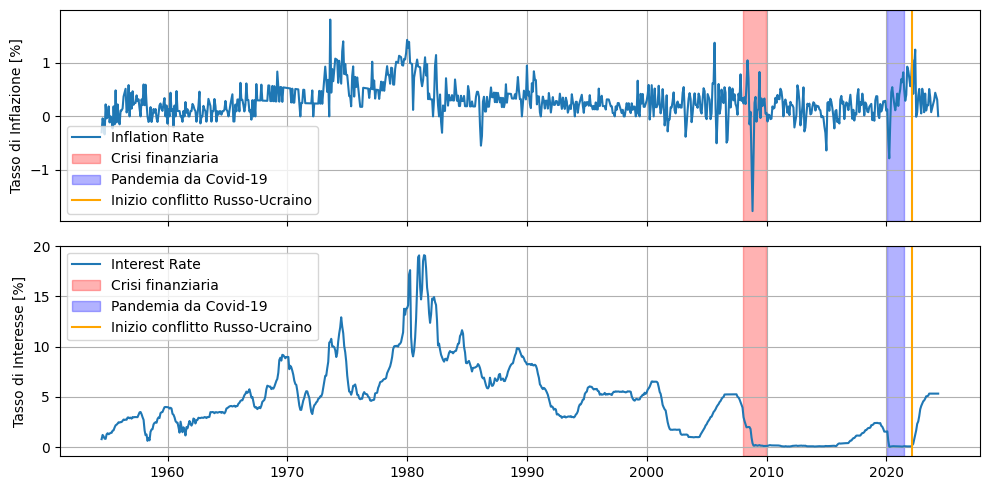

In [89]:
# Visualization of InflationRate and InterestRate change during years
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
# InflationRate plot
ax[0].plot(data.index, data['InflationRate'], label='Inflation Rate')
#ax[0].set_title('Tasso di Inflazione')
#ax[0].axvspan('1995-01-01', '2001-12-31', color='grey', alpha=0.3, label='Internet bubble')
ax[0].axvspan('2008-01-01', '2009-12-31', color='red', alpha=0.3, label='Crisi finanziaria')
ax[0].axvspan('2020-02-01', '2021-06-30', color='blue', alpha=0.3, label='Pandemia da Covid-19')
ax[0].axvline(pd.to_datetime('2022-02-24'), color='orange', label='Inizio conflitto Russo-Ucraino')
ax[0].set_ylabel("Tasso di Inflazione [%]")
ax[0].grid()
ax[0].legend()

#InterestRate Plot
ax[1].plot(data.index, data['InterestRate'], label='Interest Rate')
#ax[1].set_title('Tasso di Interesse')
#ax[1].axvspan('1995-01-01', '2001-12-31', color='grey', alpha=0.3, label='Internet bubble')
ax[1].axvspan('2008-01-01', '2009-12-31', color='red', alpha=0.3, label='Crisi finanziaria')
ax[1].axvspan('2020-02-01', '2021-06-30', color='blue', alpha=0.3, label='Pandemia da Covid-19')
ax[1].axvline(pd.to_datetime('2022-02-24'), color='orange', label='Inizio conflitto Russo-Ucraino')
ax[1].legend()
ax[1].set_ylabel("Tasso di Interesse [%]")
ax[1].grid()
plt.tight_layout()
plt.show()


Ingrandimento agli ultimi 25 anni

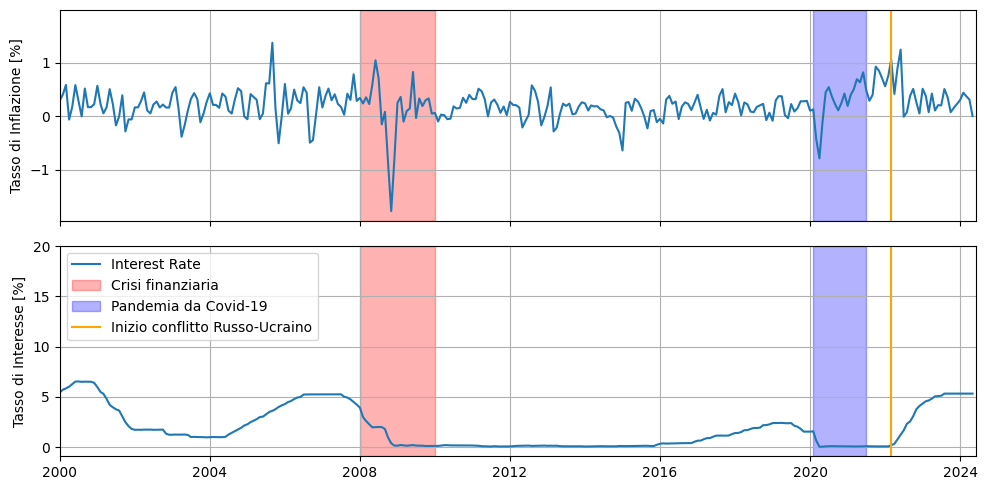

In [91]:
# Visualization of InflationRate and InterestRate change during years
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
# InflationRate plot
ax[0].plot(data.index, data['InflationRate'], label='Inflation Rate')
#ax[0].set_title('Tasso di Inflazione')
#ax[0].axvspan('1995-01-01', '2001-12-31', color='grey', alpha=0.3, label='Internet bubble')
ax[0].axvspan('2008-01-01', '2009-12-31', color='red', alpha=0.3, label='Crisi finanziaria')
ax[0].axvspan('2020-02-01', '2021-06-30', color='blue', alpha=0.3, label='Pandemia da Covid-19')
ax[0].axvline(pd.to_datetime('2022-02-24'), color='orange', label='Inizio conflitto Russo-Ucraino')
ax[0].set_ylabel("Tasso di Inflazione [%]")
ax[0].grid()
#ax[0].legend()

#InterestRate Plot
ax[1].plot(data.index, data['InterestRate'], label='Interest Rate')
#ax[1].set_title('Tasso di Interesse')
#ax[1].axvspan('1995-01-01', '2001-12-31', color='grey', alpha=0.3, label='Internet bubble')
ax[1].axvspan('2008-01-01', '2009-12-31', color='red', alpha=0.3, label='Crisi finanziaria')
ax[1].axvspan('2020-02-01', '2021-06-30', color='blue', alpha=0.3, label='Pandemia da Covid-19')
ax[1].axvline(pd.to_datetime('2022-02-24'), color='orange', label='Inizio conflitto Russo-Ucraino')
ax[1].legend()
ax[1].set_ylabel("Tasso di Interesse [%]")
ax[1].grid()
plt.xlim([pd.to_datetime("2000-01-01"), pd.to_datetime("2024-05-31")])
plt.tight_layout()
plt.show()

## 2. Distribuzione del tasso di disoccupazione per stato

In [48]:
# Retrieving the unemployment rate per state
unrate = fred.search("unemployment state")
unrate_filter = (unrate['seasonal_adjustment_short'] == "SA") & (unrate['frequency'] == 'Monthly') & (unrate['units'] == "Percent") & (unrate['title'].str.startswith("Unemployment Rate in"))
unrate = unrate[unrate_filter]
#unrate.drop(index=["LASMT261982000000003", "LASMT391746000000003"], inplace=True)
unrateSeries = []
for seriesId in unrate.index:
    unrateSeries.append(pd.Series(fred.get_series(seriesId), name=seriesId))
    time.sleep(0.2) # Senza viene bloccata l' api
dfUnrate = pd.concat(unrateSeries, axis=1)

In [49]:
# Getting the states
statesSeriesId = unrate.index
states = unrate['title'].apply(lambda x: str.upper(x.replace("Unemployment Rate in ", ""))).to_list()
statesDf = pd.DataFrame({'State': states}, index=statesSeriesId)

In [50]:
dfUnratePerYear = dfUnrate.reset_index()
dfUnratePerYear['year'] = dfUnratePerYear['index'].dt.year  # Estrai l'anno dalla data
dfUnratePerYear = dfUnratePerYear.drop(columns=["index"]).groupby("year").mean()
unrateStateNameDf = dfUnratePerYear.T.merge(statesDf, left_index=True, right_index=True).set_index("State")


In [51]:
# Retrieving the usa shapefile
usa = gpd.read_file("data/usmap/States_shapefile.shp")
usa['State_Name'] = usa['State_Name'].apply(lambda x: str.upper(x))
usa_data = usa.merge(unrateStateNameDf, left_on='State_Name', right_index=True)


In [52]:

# Interactive plotting of the unemp rate in the U.S.
def plotUSUnrate(year):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))  # Aumenta le dimensioni della figura
    usa_data.plot(column=year, cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
    plt.title(f'Tasso di disoccupazione [%] nel {year}', fontsize=15)  # Aumenta la dimensione del titolo
    plt.axis('off')  # Rimuove gli assi
    plt.tight_layout()  # Elimina gli spazi bianchi
    plt.show()
    

interactive_plot = widgets.interactive(plotUSUnrate, year=widgets.IntSlider(min=1976, max=2024, step=1, value=2024, description='Anno'))
display(interactive_plot)

interactive(children=(IntSlider(value=2024, description='Anno', max=2024, min=1976), Output()), _dom_classes=(…

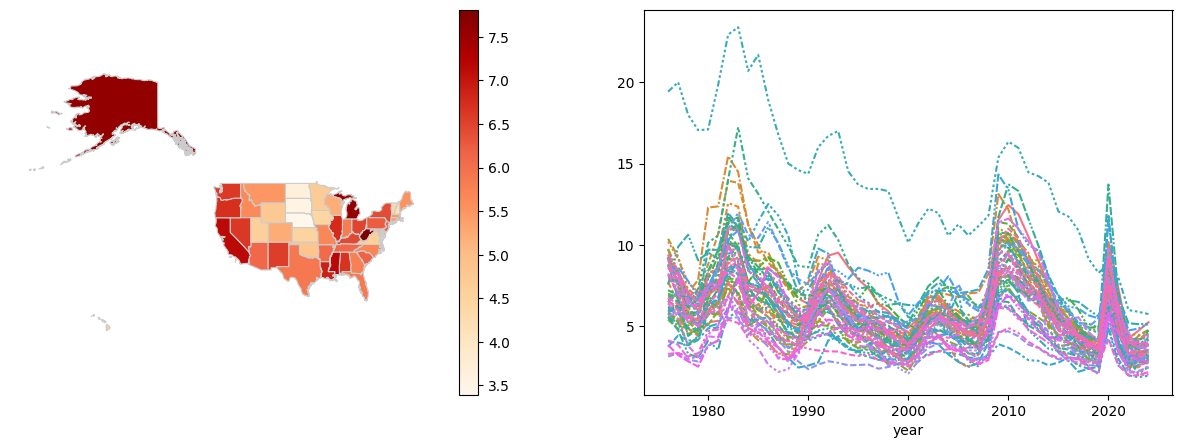

In [53]:
anni = [anno for anno in range(1976, 2025)]
usa_data['Media 1976-2024'] = usa_data[anni].mean(axis=1)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
usa_data.plot(column='Media 1976-2024', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax[0])
ax[0].axis(False)
sns.lineplot(dfUnratePerYear, legend=False)
plt.show()